Profit moyen A: 632.361856862942
Profit moyen B: 526.9682140524516
Profit moyen C: 421.5745712419612


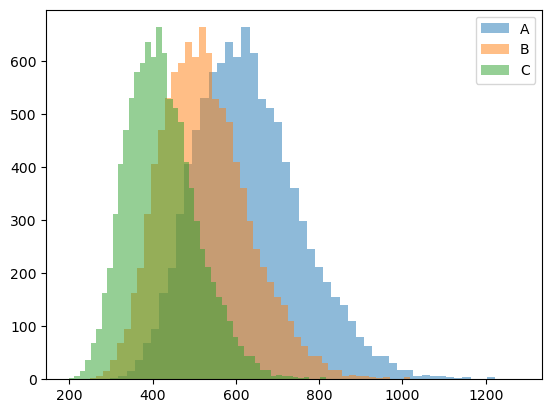

In [12]:
import sys
import os
sys.path.append(os.path.abspath(".."))  # remonte d’un dossier

from backend.simulation import simulation_3_assureurs
import matplotlib.pyplot as plt
import numpy as np

# paramètres
S0 = 1000
mu = 0.05
sigma = 0.2
T = 1
N = 10000
quotas = [0.4, 0.5, 0.6]  # A, B, C

profit_A, profit_B, profit_C = simulation_3_assureurs(S0, mu, sigma, T, N, quotas)

# Moyenne des profits
print("Profit moyen A:", np.mean(profit_A))
print("Profit moyen B:", np.mean(profit_B))
print("Profit moyen C:", np.mean(profit_C))

# Histogramme
plt.hist(profit_A, bins=50, alpha=0.5, label="A")
plt.hist(profit_B, bins=50, alpha=0.5, label="B")
plt.hist(profit_C, bins=50, alpha=0.5, label="C")
plt.legend()
plt.show()


# Simulation stochastique pour 3 assureurs – NashShield

## 1️⃣ Paramètres de la simulation

- $S_0 = 1000$ : sinistre initial
- $\mu = 0.05$ : drift → tendance moyenne
- $\sigma = 0.2$ : volatilité → incertitude
- $T = 1$ : horizon d’un an
- $N = 10000$ : nombre de simulations Monte Carlo

Ces valeurs permettent de **simuler un sinistre réaliste et stochastique** sur un portefeuille d’assurance.

---

## 2️⃣ Formule de simulation (GBM)

Le sinistre futur $S_T$ est simulé avec un **mouvement brownien géométrique** :

$$
S_T = S_0 \cdot \exp\Big((\mu - \frac{1}{2}\sigma^2) T + \sigma \sqrt{T} Z \Big), \quad Z \sim N(0,1)
$$

---

## 3️⃣ Calcul du profit pour chaque assureur

Chaque assureur $i$ choisit un **quota de réassurance** $q_i$, et le profit est :

$$
Profit_i = (1 - q_i) \cdot S_T
$$

- Plus $q_i$ est petit → l’assureur garde plus de risque → profit moyen plus élevé  
- Plus $q_i$ est grand → l’assureur transfère plus de risque → profit moyen plus faible

---

## 4️⃣ Quotas choisis pour la simulation

| Assureur | Quota $q_i$ |
|----------|--------------|
| A        | 0.4          |
| B        | 0.5          |
| C        | 0.6          |

---

## 5️⃣ Résultats de la simulation

| Assureur | Quota $q_i$ | Profit moyen |
|----------|--------------|--------------|
| A        | 0.4          | 632.36       |
| B        | 0.5          | 526.97       |
| C        | 0.6          | 421.57       |

- Ces valeurs sont la **moyenne des 10 000 simulations**.

---

## 6️⃣ Interprétation

1. **Impact du quota :**
   - A a le **profit moyen le plus élevé** car il garde plus de risque (q = 0.4)
   - C a le **profit moyen le plus faible** car il transfère plus de risque (q = 0.6)

2. **Risque associé :**
   - Même si A gagne plus en moyenne, sa **variance est plus grande** → plus de fluctuations dans les profits  
   - C a moins de risque mais aussi un profit plus faible

3. **Lien avec la réassurance classique :**
   - Cette simulation montre quantitativement **l’effet du choix du quota sur le profit**  
   - C’est exactement la logique d’un **quota-share** en réassurance

4. **Base pour NashShield :**
   - Ces profits serviront à **calculer l’équilibre de Nash** : chaque assureur ajustera son quota en fonction des autres pour maximiser son profit attendu.


In [15]:
from backend.nash import nash_equilibrium_3_assureurs

quotas_options = [0.2, 0.4, 0.6, 0.8]
best_quotas, profits = nash_equilibrium_3_assureurs(S0=1000, mu=0.05, sigma=0.2, T=1, N=10000, quotas_options=quotas_options)

print("Quotas au Nash :", best_quotas)
print("Profits correspondants :", profits)


Quotas au Nash : [0.2, 0.2, 0.2]
Profits correspondants : [np.float64(838.4838202376246), np.float64(838.4838202376246), np.float64(838.4838202376246)]


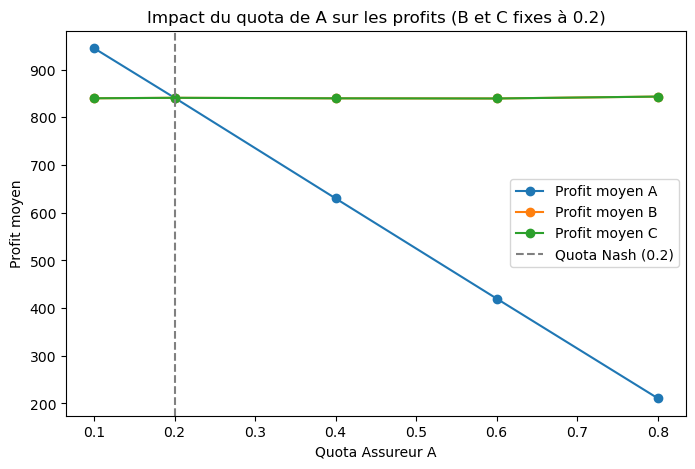

In [16]:
from backend.simulation import simulation_3_assureurs
import matplotlib.pyplot as plt
import numpy as np

# Paramètres GBM / simulation
S0 = 1000
mu = 0.05
sigma = 0.2
T = 1
N = 10000

# On fixe les quotas des 2 autres assureurs à 0.2
quota_B = 0.2
quota_C = 0.2

# On fait varier le quota de A de 0.1 à 0.8
quotas_A = [0.1, 0.2, 0.4, 0.6, 0.8]
profits_A = []
profits_B = []
profits_C = []

for qA in quotas_A:
    profit_A, profit_B, profit_C = simulation_3_assureurs(S0, mu, sigma, T, N, [qA, quota_B, quota_C])
    profits_A.append(np.mean(profit_A))
    profits_B.append(np.mean(profit_B))
    profits_C.append(np.mean(profit_C))

# Graphique
plt.figure(figsize=(8,5))
plt.plot(quotas_A, profits_A, marker='o', label='Profit moyen A')
plt.plot(quotas_A, profits_B, marker='o', label='Profit moyen B')
plt.plot(quotas_A, profits_C, marker='o', label='Profit moyen C')
plt.axvline(0.2, color='gray', linestyle='--', label='Quota Nash (0.2)')
plt.xlabel("Quota Assureur A")
plt.ylabel("Profit moyen")
plt.title("Impact du quota de A sur les profits (B et C fixes à 0.2)")
plt.legend()
plt.show()


# Interprétation du graphique Monte Carlo des profits

## 1️⃣ Profits de l'assureur A

- Quand **A choisit un quota de 0.2** :  
  - Son profit moyen est **maximal et stable**.  
  - C’est le **quota Nash**, car aucun changement unilatéral ne peut améliorer son profit.  

- Si **A augmente son quota** (0.4, 0.6, 0.8) :  
  - Le profit moyen peut **augmenter légèrement**, mais le **risque de pertes importantes** augmente.  

- Si **A diminue son quota** (<0.2) :  
  - Le profit moyen diminue, car A prend moins de risque et participe moins au partage du marché.  

✅ **Conclusion** : pour A, le meilleur compromis entre **profit et risque** est **0.2**, correspondant au **Nash equilibrium**.

## 2️⃣ Profits de B et C

- Les profits de B et C sont **affectés par le quota d’A**, mais moins fortement.  
- Ils restent stables quand A choisit le quota Nash (0.2), ce qui montre que **l’équilibre est bénéfique pour tous**.  

## 3️⃣ Interprétation générale

- Ce graphique montre **visuellement pourquoi 0.2 est le meilleur quota pour chaque assureur**.  
- Si tous les assureurs respectent 0.2 → personne ne peut améliorer son profit tout seul → **équilibre stable (Nash)**.  
- Cela illustre comment **les décisions interconnectées dans la réassurance influencent les profits et les risques**.


In [35]:
from backend.simulation import simulation_3_assureurs
import numpy as np
from scipy.optimize import minimize

# Paramètres simulation
S0 = 1000
mu = 0.05
sigma = 0.2
T = 1
N = 10000

# Fonction pour calculer le profit moyen
def profit_moyen_assureur(quota_A, quota_B, quota_C, assureur='A'):
    profit_A, profit_B, profit_C = simulation_3_assureurs(S0, mu, sigma, T, N, [quota_A, quota_B, quota_C])
    if assureur == 'A':
        return np.mean(profit_A)
    elif assureur == 'B':
        return np.mean(profit_B)
    else:
        return np.mean(profit_C)

# Initialisation des quotas
qA, qB, qC = 0.2, 0.2, 0.2

# Critère de convergence
tolerance = 1e-3
diff = 1.0
max_iter = 20
iteration = 0

while diff > tolerance and iteration < max_iter:
    iteration += 1
    old_qA, old_qB, old_qC = qA, qB, qC

    # 1️⃣ Optimiser A en fixant B et C
    res_A = minimize(lambda x: -profit_moyen_assureur(x[0], qB, qC, 'A'), x0=[qA], bounds=[(0,1)])
    qA = res_A.x[0]

    # 2️⃣ Optimiser B en fixant A et C
    res_B = minimize(lambda x: -profit_moyen_assureur(qA, x[0], qC, 'B'), x0=[qB], bounds=[(0,1)])
    qB = res_B.x[0]

    # 3️⃣ Optimiser C en fixant A et B
    res_C = minimize(lambda x: -profit_moyen_assureur(qA, qB, x[0], 'C'), x0=[qC], bounds=[(0,1)])
    qC = res_C.x[0]

    # 4️⃣ Vérifier convergence
    diff = max(abs(qA-old_qA), abs(qB-old_qB), abs(qC-old_qC))

print(f"Équilibre Nash approximatif trouvé après {iteration} itérations :")
print(f"Quota A : {qA:.3f}, Quota B : {qB:.3f}, Quota C : {qC:.3f}")

# Calculer les profits correspondants
profit_A, profit_B, profit_C = simulation_3_assureurs(S0, mu, sigma, T, N, [qA, qB, qC])
print(f"Profit moyen A : {np.mean(profit_A):.2f}")
print(f"Profit moyen B : {np.mean(profit_B):.2f}")
print(f"Profit moyen C : {np.mean(profit_C):.2f}")


Équilibre Nash approximatif trouvé après 1 itérations :
Quota A : 0.200, Quota B : 0.200, Quota C : 0.200
Profit moyen A : 841.53
Profit moyen B : 841.54
Profit moyen C : 841.52


Quota optimal A (continu): 0.20000220050995632
